In [4]:
import pandas as pd
import numpy as np

# Create the dataframe
data = {
    "Name": ["Alice", "Bob", "Charlie", "David", "Eve"],
    "Age": [28, 34, 29, 45, 32],
    "Department": ["HR", "IT", "Marketing", "IT", "HR"],
    "Salary": [50000, 60000, 45000, 70000, 52000]
}
df = pd.DataFrame(data)

# Save to CSV file
df.to_csv('employees.csv', index=False)
df

,Name,Age,Department,Salary
0,Alice,28,HR,50000
1,Bob,34,IT,60000
2,Charlie,29,Marketing,45000
3,David,45,IT,70000
4,Eve,32,HR,52000


## Convert to number Department using LabelEncoder from sklearn.preprocessing

In [5]:

from sklearn.preprocessing import LabelEncoder

# Create the dataframe
data = {
    "Name": ["Alice", "Bob", "Charlie", "David", "Eve"],
    "Age": [28, 34, 29, 45, 32],
    "Department": ["HR", "IT", "Marketing", "IT", "HR"],
    "Salary": [50000, 60000, 45000, 70000, 52000]
}
df = pd.DataFrame(data)

# Encode the 'Department' column
label_encoder = LabelEncoder()
df['Department'] = label_encoder.fit_transform(df['Department'])

df.to_csv('employees_encoded.csv', index=False)
# Show the encoded dataframe
df


,Name,Age,Department,Salary
0,Alice,28,0,50000
1,Bob,34,1,60000
2,Charlie,29,2,45000
3,David,45,1,70000
4,Eve,32,0,52000


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [7]:
# Load the dataset
df = pd.read_csv('employees_encoded.csv')

# Define features and target
X = df.drop(columns=['Name', 'Department'])
y = df['Department']

In [8]:
# After dropping label
X

,Age,Salary
0,28,50000
1,34,60000
2,29,45000
3,45,70000
4,32,52000


In [9]:
# y is target variable
y

0    0
1    1
2    2
3    1
4    0
Name: Department, dtype: int64

In [10]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# The accuracy of the Decision Tree is 0.0 because of small dataset, overfitting and split variable

In [11]:
# Predict and evaluate the model
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.0

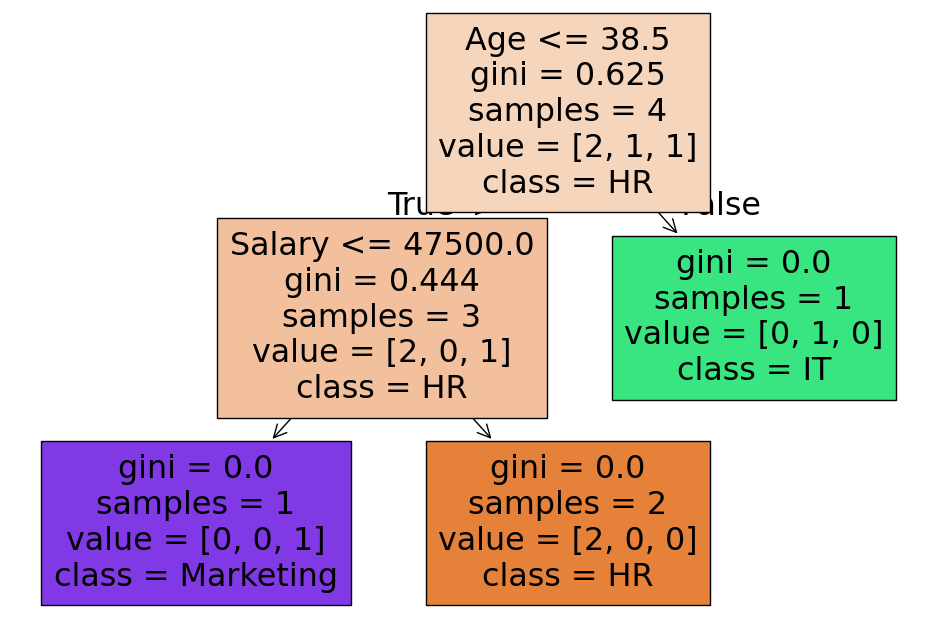

In [12]:
# OVisualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=label_encoder.classes_)
plt.show()

# Making A larger Dataset

In [13]:
data = {
    "Name": ["Alice", "Bob", "Charlie", "David", "Eve"],
    "Age": [28, 34, 29, 45, 32],
    "Department": ["HR", "IT", "Marketing", "IT", "HR"],
    "Salary": [50000, 60000, 45000, 70000, 52000]
}
df = pd.DataFrame(data)
df.head()

,Name,Age,Department,Salary
0,Alice,28,HR,50000
1,Bob,34,IT,60000
2,Charlie,29,Marketing,45000
3,David,45,IT,70000
4,Eve,32,HR,52000


In [14]:
# Generate a larger dataset by replicating and modifying the base data
np.random.seed(42)
n_samples = 400  # Number of samples for the larger dataset

# Create new rows by sampling from the base data
large_df = pd.concat([df] * (n_samples // len(df)), ignore_index=True)
large_df = large_df.sample(n=n_samples, replace=True).reset_index(drop=True)


# Add some variability to the data
large_df['Age'] = large_df['Age'] + np.random.randint(-5, 5, size=n_samples)
large_df['Age'].head()

0    25
1    49
2    24
3    38
4    29
Name: Age, dtype: int64

In [18]:
# Add some variability to the data
large_df['Salary'] = large_df['Salary'] + np.random.randint(-5000, 5000, size=n_samples)
large_df.head(10)

,Name,Age,Department,Salary
0,Charlie,25,Marketing,41931
1,David,49,IT,71663
2,Alice,24,HR,47999
3,Bob,38,IT,54404
4,Bob,29,IT,58156
5,David,47,IT,67406
6,Alice,23,HR,50812
7,Charlie,32,Marketing,45835
8,Bob,34,IT,58886
9,Eve,33,HR,45598


In [19]:
# get row and column
large_df.shape

(400, 4)

In [20]:

# Encode the 'Department' column
label_encoder = LabelEncoder()
large_df['Department'] = label_encoder.fit_transform(large_df['Department'])

In [21]:
# saving as csv file
large_df.to_csv('large_employees_encoded.csv', index=False)

In [22]:
# drop label because machine learning understand number
X = large_df.drop(columns=['Name', 'Department'])
X

,Age,Salary
0,25,41931
1,49,71663
2,24,47999
3,38,54404
4,29,58156
...,...,...
395,27,44283
396,44,79150
397,27,47719
398,38,51914
